In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("HamSpam.csv",encoding = "latin1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,spam,"""Congratulations.""",NaN,NaN,NaN
1,spam,"""Need quick cash? Get a payday loan instantly ...",NaN,NaN,NaN
2,spam,"""Final notice: You qualify for debt relief up ...",NaN,NaN,NaN
3,spam,"""Special offer just for you! Get a loan of up ...",NaN,NaN,NaN
4,spam,"""You're eligible for a low-interest mortgage r...",NaN,NaN,NaN
...,...,...,...,...,...
5607,spam,"""Join our exclusive product testing panel and ...",NaN,NaN,NaN
5608,spam,"""Congratulations! Youve been selected to rece...",NaN,NaN,NaN
5609,spam,"""Want to test our new wireless earbuds? Get a ...",NaN,NaN,NaN
5610,spam,"""Free sample alert! Try our organic energy dri...",NaN,NaN,NaN


In [3]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,spam,"""Congratulations.""",NaN,NaN,NaN
1,spam,"""Need quick cash? Get a payday loan instantly ...",NaN,NaN,NaN
2,spam,"""Final notice: You qualify for debt relief up ...",NaN,NaN,NaN
3,spam,"""Special offer just for you! Get a loan of up ...",NaN,NaN,NaN
4,spam,"""You're eligible for a low-interest mortgage r...",NaN,NaN,NaN


In [4]:
df.shape

(5612, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5612 entries, 0 to 5611
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5612 non-null   object
 1   v2          5612 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 219.3+ KB


# Drop Columns

In [6]:
df = df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
df

,v1,v2
0,spam,"""Congratulations."""
1,spam,"""Need quick cash? Get a payday loan instantly ..."
2,spam,"""Final notice: You qualify for debt relief up ..."
3,spam,"""Special offer just for you! Get a loan of up ..."
4,spam,"""You're eligible for a low-interest mortgage r..."
...,...,...
5607,spam,"""Join our exclusive product testing panel and ..."
5608,spam,"""Congratulations! Youve been selected to rece..."
5609,spam,"""Want to test our new wireless earbuds? Get a ..."
5610,spam,"""Free sample alert! Try our organic energy dri..."


# Rename Columns

In [7]:
df = df.rename(columns = {'v1':'target','v2':'text'})
df

,target,text
0,spam,"""Congratulations."""
1,spam,"""Need quick cash? Get a payday loan instantly ..."
2,spam,"""Final notice: You qualify for debt relief up ..."
3,spam,"""Special offer just for you! Get a loan of up ..."
4,spam,"""You're eligible for a low-interest mortgage r..."
...,...,...
5607,spam,"""Join our exclusive product testing panel and ..."
5608,spam,"""Congratulations! Youve been selected to rece..."
5609,spam,"""Want to test our new wireless earbuds? Get a ..."
5610,spam,"""Free sample alert! Try our organic energy dri..."


In [8]:
df.target.unique()

array(['spam', 'ham'], dtype=object)

In [9]:
df.target.value_counts()

target
ham     4825
spam     787
Name: count, dtype: int64

# Label Encoder

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df.target = encoder.fit_transform(df.target)

In [12]:
df

,target,text
0,1,"""Congratulations."""
1,1,"""Need quick cash? Get a payday loan instantly ..."
2,1,"""Final notice: You qualify for debt relief up ..."
3,1,"""Special offer just for you! Get a loan of up ..."
4,1,"""You're eligible for a low-interest mortgage r..."
...,...,...
5607,1,"""Join our exclusive product testing panel and ..."
5608,1,"""Congratulations! Youve been selected to rece..."
5609,1,"""Want to test our new wireless earbuds? Get a ..."
5610,1,"""Free sample alert! Try our organic energy dri..."


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(403)

In [15]:
df = df.drop_duplicates(keep = 'first')

In [16]:
df.duplicated().sum()

np.int64(0)

# O : Ham , 1 : Spam

In [17]:
df.target.value_counts()

target
0    4516
1     693
Name: count, dtype: int64

In [18]:
df.shape

(5209, 2)

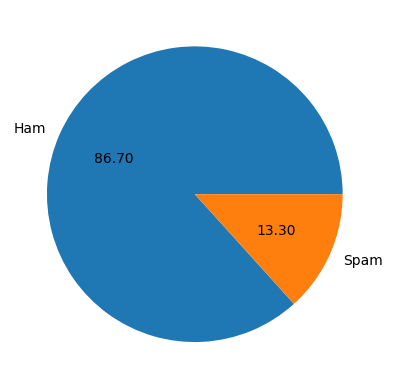

In [19]:
import matplotlib.pyplot as plt
plt.pie(df.target.value_counts() , labels = ['Ham','Spam'] , autopct = '%0.2f')
plt.show()

# Up - Sampling

In [20]:
df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0]

In [21]:
df_minority

,target,text
0,1,"""Congratulations."""
1,1,"""Need quick cash? Get a payday loan instantly ..."
2,1,"""Final notice: You qualify for debt relief up ..."
3,1,"""Special offer just for you! Get a loan of up ..."
4,1,"""You're eligible for a low-interest mortgage r..."
...,...,...
5607,1,"""Join our exclusive product testing panel and ..."
5608,1,"""Congratulations! Youve been selected to rece..."
5609,1,"""Want to test our new wireless earbuds? Get a ..."
5610,1,"""Free sample alert! Try our organic energy dri..."


In [22]:
df_majority

,target,text
10,0,"Go until jurong point, crazy.. Available only ..."
11,0,Ok lar... Joking wif u oni...
13,0,U dun say so early hor... U c already then say...
14,0,"Nah I don't think he goes to usf, he lives aro..."
16,0,Even my brother is not like to speak with me. ...
...,...,...
5575,0,Huh y lei...
5578,0,Will Ì_ b going to esplanade fr home?
5579,0,"Pity, * was in mood for that. So...any other s..."
5580,0,The guy did some bitching but I acted like i'd...


In [23]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, replace = True , n_samples = len(df_majority), random_state = 42)

In [24]:
df = pd.concat([df_majority , df_minority_upsampled])

In [25]:
df.target.value_counts()

target
0    4516
1    4516
Name: count, dtype: int64

In [26]:
import nltk

In [27]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tabish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
df['Characters'] = df.text.apply(len)

In [29]:
df

,target,text,Characters
10,0,"Go until jurong point, crazy.. Available only ...",111
11,0,Ok lar... Joking wif u oni...,29
13,0,U dun say so early hor... U c already then say...,49
14,0,"Nah I don't think he goes to usf, he lives aro...",61
16,0,Even my brother is not like to speak with me. ...,77
...,...,...,...
4760,1,Your weekly Cool-Mob tones are ready to downlo...,160
3976,1,YOU HAVE WON! As a valued Vodafone customer ou...,135
3914,1,Do you want a new video handset? 750 anytime a...,145
3800,1,"Twinks, bears, scallies, skins and jocks are c...",156


In [30]:
df['Words'] = df.text.apply(lambda row:len(nltk.word_tokenize(row)))

In [31]:
df['Sentences'] = df.text.apply(lambda row:len(nltk.sent_tokenize(row)))

In [32]:
df

,target,text,Characters,Words,Sentences
10,0,"Go until jurong point, crazy.. Available only ...",111,24,2
11,0,Ok lar... Joking wif u oni...,29,8,2
13,0,U dun say so early hor... U c already then say...,49,13,1
14,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
16,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
4760,1,Your weekly Cool-Mob tones are ready to downlo...,160,41,1
3976,1,YOU HAVE WON! As a valued Vodafone customer ou...,135,28,4
3914,1,Do you want a new video handset? 750 anytime a...,145,28,5
3800,1,"Twinks, bears, scallies, skins and jocks are c...",156,35,4


In [33]:
df[df.target==1][['Characters','Words','Sentences']].describe()

,Characters,Words,Sentences
count,4516.000000,4516.000000,4516.000000
mean,136.130425,27.521922,2.978299
std,31.040317,6.999554,1.463311
min,13.000000,2.000000,1.000000
25%,127.000000,25.000000,2.000000
50%,147.000000,28.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='Characters', ylabel='Count'>

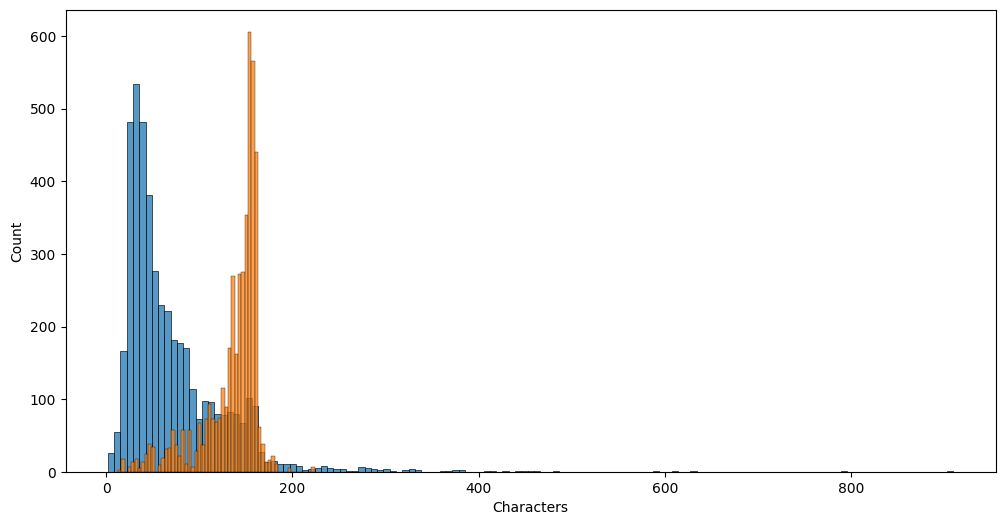

In [35]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['Characters'])
sns.histplot(df[df['target'] == 1]['Characters'])

<Axes: xlabel='Words', ylabel='Count'>

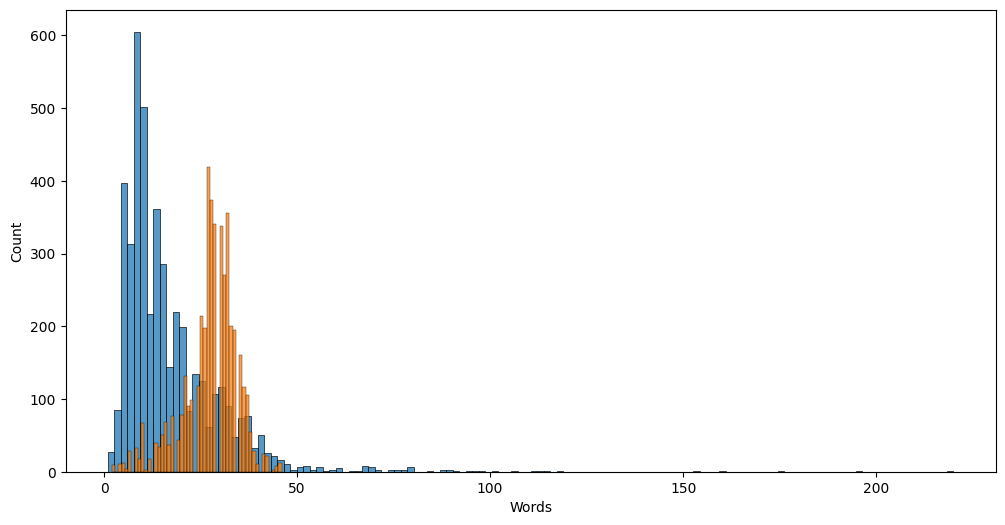

In [36]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['Words'])
sns.histplot(df[df['target'] == 1]['Words'])

<Axes: xlabel='Sentences', ylabel='Count'>

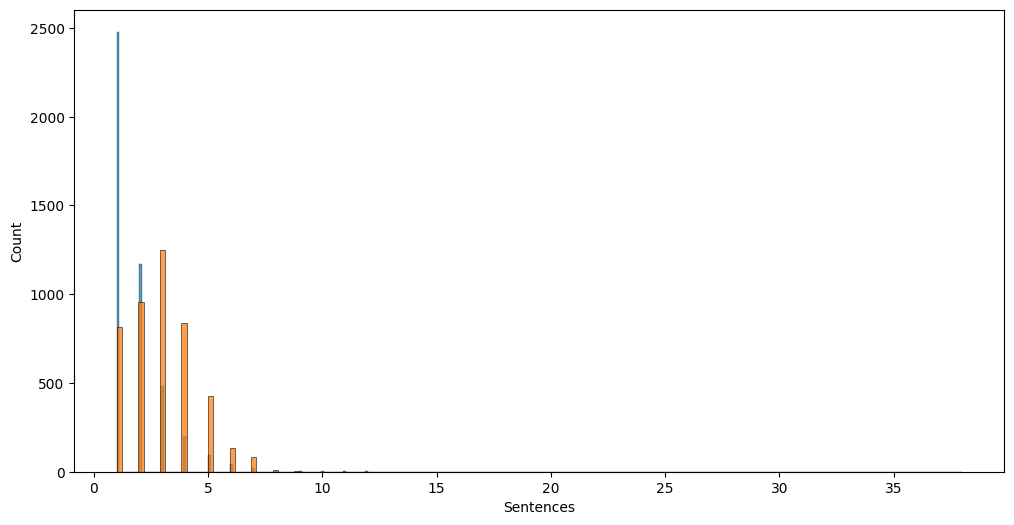

In [37]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['Sentences'])
sns.histplot(df[df['target'] == 1]['Sentences'])

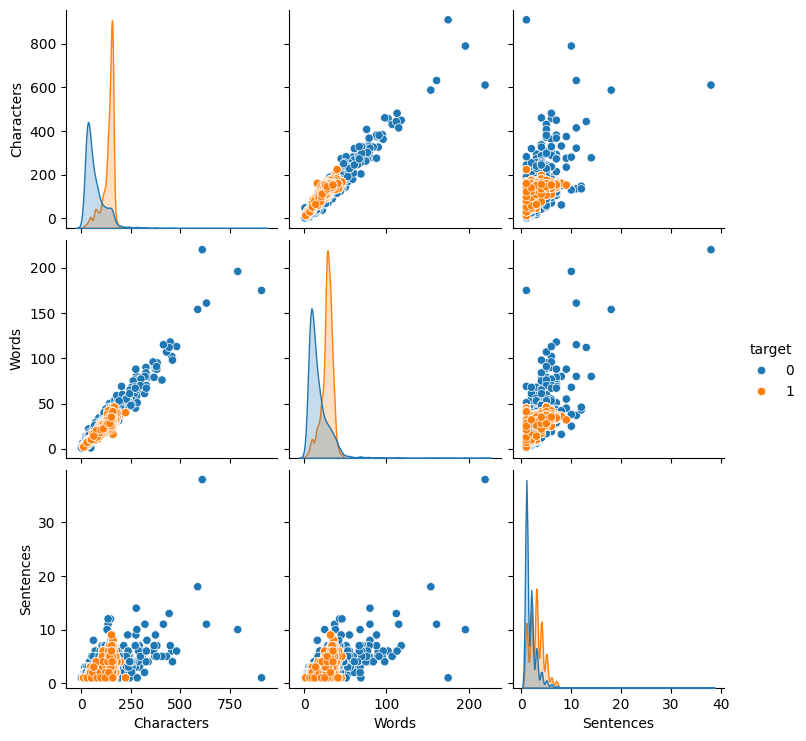

In [38]:
sns.pairplot(df,hue = 'target')

In [39]:
df.select_dtypes(include = ['number']).corr()

,target,Characters,Words,Sentences
target,1.000000,0.585269,0.435461,0.376712
Characters,0.585269,1.000000,0.947811,0.580114
Words,0.435461,0.947811,1.000000,0.637286
Sentences,0.376712,0.580114,0.637286,1.000000


<Axes: >

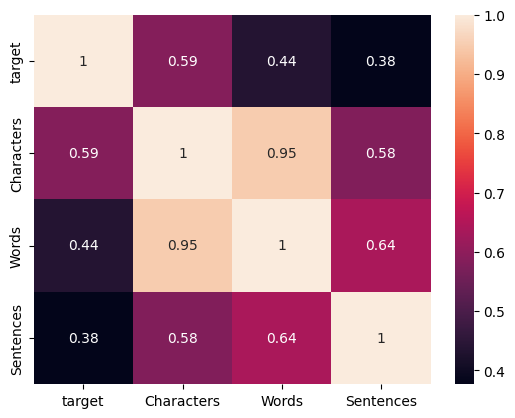

In [40]:
sns.heatmap(df.select_dtypes(include = ['number']).corr() , annot = True)

# Remove Stop_Words , Punctuations , Perform Stemming

In [41]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tabish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
import string

In [43]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [44]:
def text_transformer(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    
    for i in text:
        if i.isalnum():    # For Alphanumeric
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('English') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [45]:
df['transformed_text'] = df.text.apply(text_transformer)

In [46]:
df

,target,text,Characters,Words,Sentences,transformed_text
10,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
11,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
13,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
14,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
16,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
...,...,...,...,...,...,...
4760,1,Your weekly Cool-Mob tones are ready to downlo...,160,41,1,weekli tone readi download week new tone inclu...
3976,1,YOU HAVE WON! As a valued Vodafone customer ou...,135,28,4,valu vodafon custom comput pick win prize coll...
3914,1,Do you want a new video handset? 750 anytime a...,145,28,5,want new video handset 750 anytim network min ...
3800,1,"Twinks, bears, scallies, skins and jocks are c...",156,35,4,twink bear scalli skin jock call miss weekend ...


# Word Cloud

In [47]:
from wordcloud import WordCloud

In [48]:
wc = WordCloud(width = 500 , height = 500 , min_font_size = 10 , background_color = 'white')

In [49]:
spam = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep = " "))

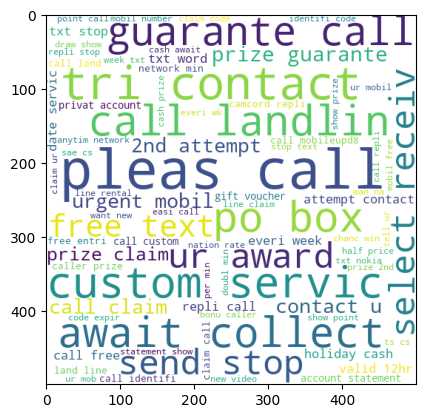

In [50]:
plt.imshow(spam)

In [51]:
Ham = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep = " "))

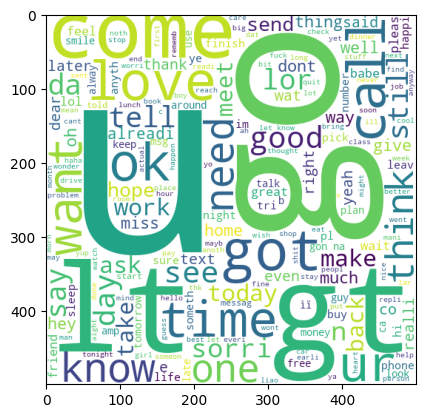

In [52]:
plt.imshow(Ham)

# Spam_Corpus

In [53]:
spam_corpus = []
for i in df[df['target']==1]['transformed_text'].tolist():
    for word in i.split():
        spam_corpus.append(word)

len(spam_corpus)

66827

In [54]:
spam_corpus

['privat',
 '2003',
 'account',
 'statement',
 'show',
 '800',
 'point',
 'call',
 '08715203694',
 'identifi',
 'code',
 '40533',
 'expir',
 'heard',
 'u4',
 'call',
 'night',
 'knicker',
 'make',
 'beg',
 'like',
 'u',
 'last',
 'time',
 '01223585236',
 'xx',
 'luv',
 'call',
 '08702490080',
 'tell',
 'u',
 '2',
 'call',
 '09066358152',
 'claim',
 'prize',
 'u',
 '2',
 'enter',
 'ur',
 'mobil',
 'person',
 'detail',
 'prompt',
 'care',
 'get',
 'ur',
 '1st',
 'rington',
 'free',
 'repli',
 'msg',
 'tone',
 'gr8',
 'top',
 '20',
 'tone',
 'phone',
 'everi',
 'week',
 'per',
 'wk',
 '2',
 'opt',
 'send',
 'stop',
 '08452810071',
 '16',
 'someon',
 'contact',
 'date',
 'servic',
 'enter',
 'phone',
 'fanci',
 'find',
 'call',
 'landlin',
 '09111032124',
 'pobox12n146tf150p',
 'sm',
 'ac',
 'sptv',
 'new',
 'jersey',
 'devil',
 'detroit',
 'red',
 'wing',
 'play',
 'ice',
 'hockey',
 'correct',
 'incorrect',
 'end',
 'repli',
 'end',
 'sptv',
 'win',
 'shop',
 'spree',
 'everi',
 'week',


In [55]:
from collections import Counter

In [56]:
Counter(spam_corpus)

Counter({'call': 2097,
         'free': 1299,
         '2': 984,
         'txt': 859,
         'u': 817,
         'ur': 767,
         'text': 762,
         'mobil': 746,
         'claim': 691,
         'stop': 684,
         'repli': 669,
         '4': 656,
         'get': 575,
         'prize': 555,
         'servic': 440,
         'new': 424,
         'send': 390,
         'contact': 382,
         'award': 373,
         'tone': 372,
         'nokia': 368,
         'urgent': 360,
         'pleas': 334,
         'cash': 326,
         'phone': 324,
         'week': 317,
         'min': 307,
         'offer': 305,
         'custom': 296,
         'collect': 293,
         'tri': 292,
         'win': 288,
         'guarante': 284,
         'per': 282,
         'c': 280,
         'number': 259,
         'cs': 254,
         'messag': 237,
         'msg': 228,
         'receiv': 227,
         'chat': 225,
         'draw': 222,
         'today': 214,
         'line': 209,
         'latest': 205

In [57]:
data = pd.DataFrame(Counter(spam_corpus).most_common(30))

In [58]:
data

,0,1
0,call,2097
1,free,1299
2,2,984
3,txt,859
4,u,817
5,ur,767
6,text,762
7,mobil,746
8,claim,691
9,stop,684


<Axes: xlabel='0', ylabel='1'>

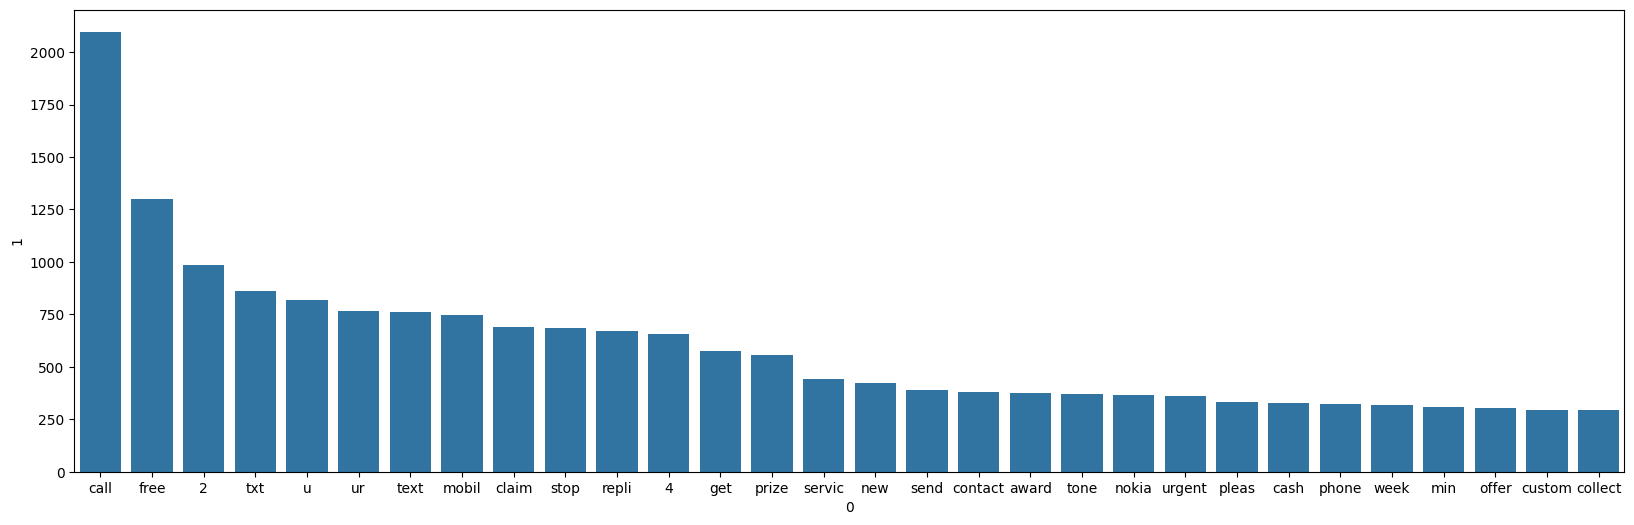

In [59]:
plt.figure(figsize = (20,6))
sns.barplot(data , x = 0 , y = 1)

# Ham Corpus

In [60]:
ham_corpus = []
for i in df[df['target']==0]['transformed_text'].tolist():
    for word in i.split():
        ham_corpus.append(word)

len(ham_corpus)

35404

In [61]:
Counter(ham_corpus)

Counter({'u': 883,
         'go': 404,
         'get': 349,
         'gt': 288,
         'lt': 287,
         '2': 284,
         'come': 275,
         'got': 236,
         'know': 236,
         'like': 234,
         'call': 233,
         'time': 219,
         'ok': 217,
         'love': 216,
         'good': 213,
         'want': 208,
         'ur': 197,
         'day': 190,
         'need': 170,
         'one': 165,
         'lor': 159,
         '4': 156,
         'home': 152,
         'think': 149,
         'see': 147,
         'take': 143,
         'still': 143,
         'da': 142,
         'tell': 133,
         'make': 129,
         'say': 127,
         'back': 127,
         'today': 123,
         'hope': 122,
         'ask': 121,
         'sorri': 121,
         'n': 120,
         'send': 120,
         'r': 120,
         'work': 118,
         'dont': 118,
         'meet': 112,
         'hi': 111,
         'well': 109,
         'thing': 109,
         'wat': 108,
         'k': 107,
  

In [62]:
new = pd.DataFrame(Counter(ham_corpus).most_common(30))

In [63]:
new

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


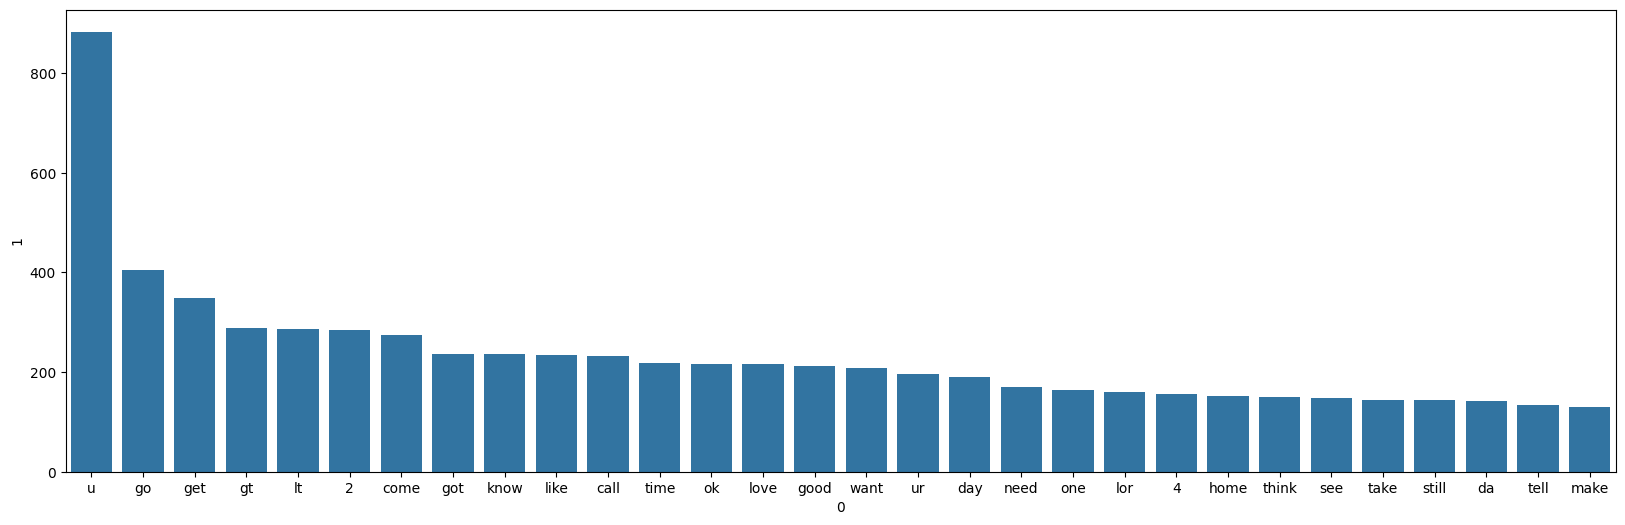

In [64]:
plt.figure(figsize = (20,6))
sns.barplot(new , x = 0 , y = 1)
plt.show()

# Model Building

In [65]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [66]:
tfidf = TfidfVectorizer(max_features = 3000)
cv = CountVectorizer(max_features = 3000)

In [67]:
x=tfidf.fit_transform(df["transformed_text"]).toarray()

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [69]:
x=scaler.fit_transform(x)

In [70]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
x.shape

(9032, 3000)

In [72]:
y=df["target"].values

In [73]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [76]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
y_train

array([0, 0, 0, ..., 1, 0, 1])

In [78]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
y_test

array([0, 1, 0, ..., 1, 0, 1])

# Naive - Bayes Algorithm

In [80]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [81]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [82]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9662423907028224
[[883  34]
 [ 27 863]]
0.9620958751393534


In [83]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9706696181516326
[[892  25]
 [ 28 862]]
0.971815107102593


In [84]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9806308799114555
[[917   0]
 [ 35 855]]
1.0


# Other Classifiers

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

In [86]:
svc=SVC(kernel="sigmoid",gamma=1.0)
knc=KNeighborsClassifier()
bnb = BernoulliNB()
dtc=DecisionTreeClassifier(max_depth=5)

lrc=LogisticRegression(solver="liblinear",penalty="l1")

rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [87]:
clfs={"SVC" : svc,
      "KN"  : knc,
      "NB"  : bnb,
      "DT"  : dtc,
      "LR"  : lrc,
      "RF"  : rfc,
      "AdaBoost":abc,
      "Bgc" : bc,
      "ETC" : etc,
      "GBC" : gbc,
      "XGB" : xgb}

In [88]:
def train_classifier(clf , x_train , y_train , x_test , y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy , precision

In [89]:
accuracy_scores = []
precision_scores = []
for name , clf in clfs.items():
    ac , prec = train_classifier(clf,x_train,y_train,x_test,y_test)
    accuracy_scores.append(ac)
    precision_scores.append(prec)
    print("For : ",name)
    print("Accuracry : ",ac)
    print("Precision : ",prec)

For :  SVC
Accuracry :  0.9479800774764804
Precision :  0.9335511982570807
For :  KN
Accuracry :  0.9706696181516326
Precision :  0.99880810488677
For :  NB
Accuracry :  0.9806308799114555
Precision :  1.0
For :  DT
Accuracry :  0.8422800221361373
Precision :  0.9340028694404591
For :  LR
Accuracry :  0.9911455451023796
Precision :  0.9888143176733781
For :  RF
Accuracry :  0.9966795794133924
Precision :  0.9944071588366891
For :  AdaBoost
Accuracry :  0.9396790260099612
Precision :  0.966547192353644
For :  Bgc
Accuracry :  0.977863862755949
Precision :  0.9579741379310345
For :  ETC
Accuracry :  0.9983397897066962
Precision :  0.9977553310886644
For :  GBC
Accuracry :  0.9070282235749861
Precision :  0.9490049751243781
For :  XGB
Accuracry :  0.9712230215827338
Precision :  0.9739819004524887


In [90]:
all_models_performances = pd.DataFrame({"Algorithms": clfs.keys(),"Accuracy" : accuracy_scores ,"Precision": precision_scores})
all_models_performances

,Algorithms,Accuracy,Precision
0,SVC,0.947980,0.933551
1,KN,0.970670,0.998808
2,NB,0.980631,1.000000
3,DT,0.842280,0.934003
4,LR,0.991146,0.988814
5,RF,0.996680,0.994407
6,AdaBoost,0.939679,0.966547
7,Bgc,0.977864,0.957974
8,ETC,0.998340,0.997755
9,GBC,0.907028,0.949005


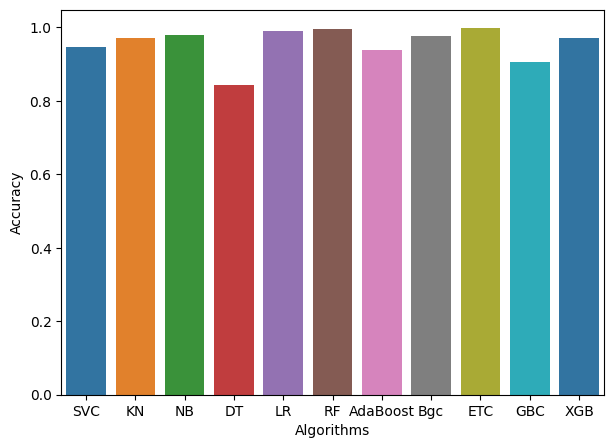

In [126]:
plt.figure(figsize = (7,5))
sns.barplot(all_models_performances , x = "Algorithms", y="Accuracy", palette = 'tab10')
plt.show()

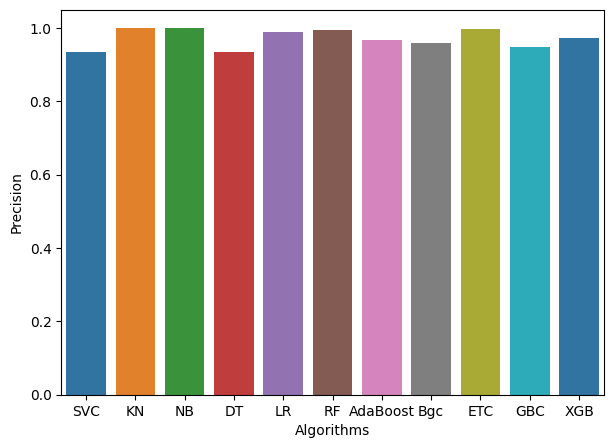

In [127]:
plt.figure(figsize = (7,5))
sns.barplot(all_models_performances , x = "Algorithms", y="Precision", palette='tab10')
plt.show()

In [128]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))